In [17]:
import pytesseract
from time import sleep, time
from PIL import ImageGrab, Image

from src.bot import *
from src.tasks import *
from src.navigation import *
from src.vision import *
from src.position import *
from src.enums.pixels import *
from src.enums.images import *
from src.enums.texts import *
from src.utils import *
from src.players_recognition.players_detector import *
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# Connecter API Cloud Vision
# recup le fichier json de la clé
# si cmd
# !set GOOGLE_APPLICATION_CREDENTIALS=environments\bot-among-us-311007-5e92f33561d5.json
# si cmd et que ça marche pas
# !setx GOOGLE_APPLICATION_CREDENTIALS environments\bot-among-us-311007-5e92f33561d5.json
# si powershell
# !$Env:GOOGLE_APPLICATION_CREDENTIALS = "environments\bot-among-us-311007-5e92f33561d5.json"
# Si ça marche pas il faut redémarrer jupyter (pas juste le notebook)
!echo %GOOGLE_APPLICATION_CREDENTIALS%

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# !pip install -r requirements.txt
b = Bot('src/img/new_walkable_small.png')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
environments\bot-among-us-311007-5e92f33561d5.json


## Players recognition

In [18]:
start = time.time()
detection_model = PlayersDetector()
print(f"It took {time.time() - start:.2f} seconds for loading model")

Building model and restoring weights for fine-tuning...
Weights restored!
It took 3.29 seconds for loading model


It took 12.10 seconds for prediction


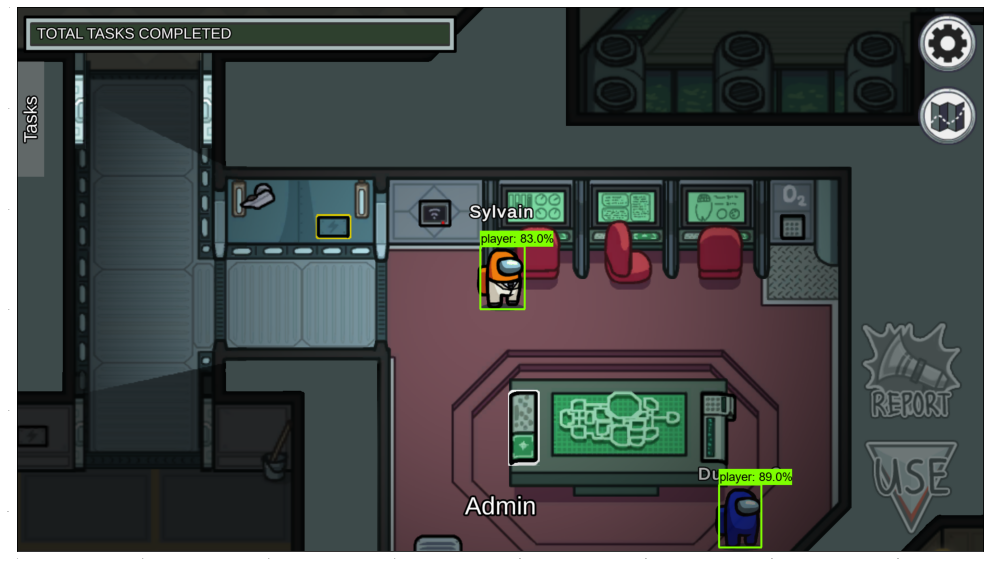

In [19]:
screenshot = np.array(pyautogui.screenshot())
start = time.time()
# matplotlib.use('tkagg')
detections = detection_model.detect_from_np_array(screenshot)
print(f"It took {time.time() - start:.2f} seconds for prediction")
plt.rcParams['figure.figsize'] = [18, 10]
plot_prediction(screenshot, detections)

boxes = detections['detection_boxes'][0].numpy()
scores = detections['detection_scores'][0].numpy()
classes = detections['detection_classes'][0].numpy().astype(np.uint32)
# display(Image.screenshot))
# Image.fromarray(screenshot)

In [20]:
# get predictions above a threshold
print(scores[scores>0.7])
boxes[scores>0.7]

[0.89027584 0.8306682 ]


array([[0.87786984, 0.72586644, 0.993117  , 0.7700573 ],
       [0.44023353, 0.4789128 , 0.555409  , 0.5253434 ]], dtype=float32)

## Auto crewmate

In [4]:
b.stop()

Terminate : <KillableThread(compute_screen, stopped 13264)>


AttributeError: 'NoneType' object has no attribute 'kill'

In [5]:
# sleep(3)
blacklist_events = [
#     'btnReportChanged', 
#     'btnKillChanged', 
    'btnSecurityChanged', 
    'btnAdminChanged', 
    'btnSabotageChanged', 
    'gamePhaseChanged', 
#     'sabotageRunningChanged'
]

### Run with some events not handled
# b.run(react_to_events=True, blacklist_events=blacklist_events)
### Run completely autonomous
b.vision_manager.game_phase = None
b.run()

Game phase : Do your tasks ! 🏃‍♂️
Submit Scan
Divert Power
Swipe Card
Download/Upload (Cafeteria)
Next task : Submit Scan
Didn't find me ! 🙈
Perform task : Submit Scan 🦾
Divert Power
Swipe Card
Download/Upload (Cafeteria)
Next task : Divert Power
Didn't find me ! 🙈
Didn't find me ! 🙈
Divert Power
Swipe Card
Download/Upload (Cafeteria)
Next task : Divert Power
Didn't find me ! 🙈
Divert Power
Swipe Card
Download/Upload (Cafeteria)
Next task : Divert Power
Didn't find me ! 🙈
Didn't find me ! 🙈
Divert Power
Swipe Card
Download/Upload (Cafeteria)
Next task : Divert Power
Didn't find me ! 🙈
Didn't find me ! 🙈
Divert Power
Swipe Card
Download/Upload (Cafeteria)
Next task : Divert Power
Didn't find me ! 🙈
Didn't find me ! 🙈
Divert Power
Swipe Card
Download/Upload (Cafeteria)
Next task : Divert Power
Didn't find me ! 🙈
Didn't find me ! 🙈
Divert Power
Swipe Card
Download/Upload (Cafeteria)
Next task : Divert Power
Didn't find me ! 🙈
Didn't find me ! 🙈
Divert Power
Swipe Card
Download/Upload (Caf

In [3]:
b.stop()

Terminate : <KillableThread(compute_screen, stopped 7720)>
Terminate : <KillableThread(read_tasks, stopped 26340)>
Terminate : <KillableThread(tasks_resolution, started 23780)>


## Vision

In [3]:
sleep(3)
VisionManager().want_to_read_tasks = True
VisionManager().start_vision_loop()

Run read_tasks !!
Run read_tasks !!
Detected that TaskType.Sabotage_Reactor is running ! ☣
Run read_tasks !!
Run read_tasks !!
Terminate : <KillableThread(sabotage_resolution, started 80868)>
Run read_tasks !!
Detected that TaskType.Sabotage_Reactor is running ! ☣
Run read_tasks !!
Didn't find me ! 🙈
Run read_tasks !!
Terminate : <KillableThread(sabotage_resolution, started 81792)>
Run read_tasks !!
Run read_tasks !!
Run read_tasks !!
Run read_tasks !!
Run read_tasks !!


In [3]:
VisionManager().stop_vision_loop()

Terminate : <KillableThread(compute_screen, started 81060)>
Terminate : <KillableThread(read_tasks, stopped 84420)>


In [3]:
print("vision thread alive:", VisionManager().is_vision_looping())
print("read tasks thread alive:", VisionManager().is_read_tasks_running())

vision thread alive: False
read tasks thread alive: False


### Check Button 


In [9]:
sleep(2)
print("impostor :", b.vision_manager.is_impostor())
print(b.vision_manager.get_game_phase())
print("use :", b.vision_manager.is_btn_use_active())
print("report :", b.vision_manager.is_btn_report_active())
print("kill :", b.vision_manager.is_btn_kill_active())
print("vent :", b.vision_manager.is_btn_vent_active())
print("sabotage :", b.vision_manager.is_btn_sabotage_active())
print("admin :", b.vision_manager.is_btn_admin_active())
print("security :", b.vision_manager.is_btn_security_active())

impostor : True
GamePhase.Game
use : False
report : False
kill : False
vent : False
sabotage : False
admin : False
security : False


### Get the nearest Task

In [4]:
b.get_tasks()

[5: Clear Asteroids,
 6: Divert Power,
 19: Fix Wires (Storage),
 36: Download/Upload (Communications)]

In [13]:
b.get_tasks()[2].location

(978, 696)

In [11]:
tasks = b.get_tasks()
for task in tasks:
    print(len(b.game_map.navigation_manager.calculate_path(b.position.find_me(), task.location)))

0
0
36
0


In [14]:
b.get_nearest_task()
b.next_task

Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾


5: Clear Asteroids

In [15]:
b.position.find_me()

(1017, 592)

## Navigate

In [24]:
def debug_neighboor_matrix(location, size=3):
    x, y = NavigationManager().convert_for_minimap(location)
    print(x-size,x+size,y-size,y+size)
    print(NavigationManager().map_matrix[y-size:y+size,x-size:x+size])

In [26]:
sleep(3)
location = (1320, 600)
b.go_to_destination(location)
debug_neighboor_matrix(location, 3)

327 333 147 153
[[3 3 3 0 0 0]
 [3 3 3 3 3 0]
 [3 3 3 3 3 3]
 [3 3 3 3 3 3]
 [3 3 1 3 3 3]
 [3 1 1 1 3 3]]


In [23]:
accept_power_task = b.game_map.task_manager.tasks[12]
accept_power_security_location = (550, 460)

shield_location_apeupres = b.game_map.task_manager.tasks[28].location

##### Demo #####
b.go_to_destination(accept_power_security_location)
# la ligne suivante c'est au cas où
b.go_to_destination(accept_power_security_location)

b.perform_task(accept_power_task)

b.go_to_destination(shield_location_apeupres)
# la ligne suivante c'est au cas où
b.go_to_destination(shield_location_apeupres)

Didn't find me ! 🙈


### Check for tasks not reachable

In [12]:
len_paths = [len(b.get_moving_actions_to_destination(task.location)) for task in b.game_map.task_manager.tasks]
for i in range(len(len_paths)):
    if len_paths[i] == 0:
        print(f"- **{b.game_map.task_manager.tasks[i]}**")
    else:
        print(f"- OK : {b.game_map.task_manager.tasks[i]}")

Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
Didn't find a path between source and target ! 🐾
D

Not found tasks :
- 0: Align Engine (Upper Engine)
- 1: Align Engine (Lower Engine)
- 2: Calibrate Distributor
- 3: Chart Course
- 5: Clear Asteroids
- 6: Divert Power
- 11: Accept Power (O2)
- 12: Accept Power (Security)
- 13: Accept Power (Shields)
- 14: Accept Power (Weapons)
- 15: Empty Garbage/Chute (Cafeteria)
- 17: Empty Garbage/Chute (Storage)
- 21: Fix Wires (Navigation)
- 22: Fix Wires (Admin)
- 27: Inspect Sample
- 29: Stabilize Steering
- 31: Submit Scan
- 34: Download/Upload (Cafeteria)
- 35: Download/Upload (Admin)
- 36: Download/Upload (Communications)
- 37: Download/Upload (Electrical)

### NAVIGAAAAAATE 🐾🐾🐾

In [4]:
b.position.find_me()
b.position.get_tuple_coordinates()

(346, 869)

### Navigate and do these tasks

In [ ]:
tasks_indexes = [4, 7, 8, 9, 10, 16, 18, 19, 20, 23, 24, 25, 26, 28, 30, 32, 33, 38, 39]
tasks = [b.game_map.task_manager.tasks[i] for i in tasks_indexes]
for task in tasks:
    print(f"Go to {task.name}")
    b.go_to_destination(task.location)
    print(f"Perform {task.name}")
    b.perform_task(task)

Go to Clean O2 Filter
Perform Clean O2 Filter
Go to Accept Power (Communications)
Didn't find me ! 🙈
Didn't find me ! 🙈
Perform Accept Power (Communications)
Go to Accept Power (Lower Engine)
Didn't find me ! 🙈
Perform Accept Power (Lower Engine)
Go to Accept Power (Upper Engine)
Didn't find me ! 🙈
Perform Accept Power (Upper Engine)
Go to Accept Power (Navigation)
Didn't find me ! 🙈
Perform Accept Power (Navigation)
Go to Empty Garbage/Chute (O2)
Didn't find me ! 🙈
Perform Empty Garbage/Chute (O2)
Go to Fix Wires (Electrical)
Perform Fix Wires (Electrical)
Go to Fix Wires (Storage)
Didn't find me ! 🙈
Perform Fix Wires (Storage)
Go to Fix Wires (Security)
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Perform Fix Wires (Security)
Go to Fix Wires (Cafeteria)
Didn't find me ! 🙈
Didn't find a path between source and target ! 🐾
Perform Fix Wires (Cafeteria)
Go to Fuel Engine (Storage)
Perform Fuel Engine (Storage)
Go to Fuel Engine (Lower Engine)
Perform Fuel Engine (L

In [5]:
# result_file_path="src/img/result_path.txt"
# grid_str = navManager.path_to_grid(path, must_print=False, result_file_path=None)

## Talk during walking (experiments)

## Solve a task

In [27]:
b.game_map.task_manager.prompt_task()

What task would you like to perform?:
0: Troubleshoot
1: Swipe_Card
2: Download_Upload
3: Fuel_Engines
4: Divert_Power
5: Empty_Chute
6: Accept_Power
7: Fix_Wires
8: Prime_Shields
9: Inspect_Sample
10: Stabilize_Steering
11: Submit_Scan
12: Align_Engine_Output
13: Clear_Asteroids
14: Clean_O2_Filter
15: Calibrate_Distributor
16: Start_Reactor
17: Chart_Course
18: Unlock_Manifold


options: 13


## Complete menu

In [5]:
b.menu()

## Troubleshoot

In [4]:
TaskManager().solve_task(TaskType.Troubleshoot)
# red 377,150
# white 354,225
# red/yellow 325,386
# black 326,347

Point(x=303, y=608)
Point(x=1654, y=858)
Point(x=1481, y=741)
Point(x=1308, y=508)
Point(x=1754, y=944)
Point(x=1232, y=733)
Point(x=1123, y=695)
Point(x=1123, y=695)
Point(x=1123, y=695)
Point(x=1123, y=695)
Point(x=1123, y=696)
Point(x=1119, y=867)
Point(x=1119, y=866)
Point(x=1119, y=866)
Point(x=1119, y=866)
Point(x=1119, y=866)
Point(x=1119, y=866)
Point(x=1118, y=863)
Point(x=972, y=705)
Point(x=965, y=702)
Point(x=965, y=702)
Point(x=965, y=702)
Point(x=965, y=702)
Point(x=793, y=539)
Point(x=793, y=539)
Point(x=793, y=539)
Point(x=888, y=451)
Point(x=950, y=370)
Point(x=950, y=370)
Point(x=950, y=370)
Point(x=950, y=370)
Point(x=950, y=370)
Point(x=950, y=370)
Point(x=710, y=363)
Point(x=365, y=295)


KeyboardInterrupt: 

In [15]:
sleep(2)
im = pyautogui.screenshot()
pixel = (1497,991)
im.getpixel(pixel)

(222, 33, 0)

In [12]:
sleep(2)
im = pyautogui.screenshot()
pixel = (PixelPositions.MAIN_BTN.value)
im.getpixel(pixel)

(202, 117, 117)

## Notes

- **0: Align Engine (Upper Engine)**
- **1: Align Engine (Lower Engine)**
- **2: Calibrate Distributor**
- **3: Chart Course**
- **4: Clean O2 Filter**
- **5: Clear Asteroids**
- **6: Divert Power**
- **7: Accept Power (Communications)**
- **8: Accept Power (Lower Engine)**
- **9: Accept Power (Upper Engine)**
- **10: Accept Power (Navigation)**
- **11: Accept Power (O2)**
- **12: Accept Power (Security)**
- **13: Accept Power (Shields)**
- **14: Accept Power (Weapons)**
- **15: Empty Garbage/Chute (Cafeteria)**
- **16: Empty Garbage/Chute (O2)**
- **17: Empty Garbage/Chute (Storage)**
- **18: Fix Wires (Electrical)**
- **19: Fix Wires (Storage)**
- **20: Fix Wires (Security)**
- **21: Fix Wires (Navigation)**
- **22: Fix Wires (Admin)**
- **23: Fix Wires (Cafeteria)**
- **24: Fuel Engine (Storage)**
- **25: Fuel Engine (Lower Engine)**
- **26: Fuel Engine (Upper Engine)**
- **27: Inspect Sample**
- 28: Prime Shields
- **29: Stabilize Steering**
- **30: Start Reactor**
- **31: Submit Scan**
- **32: Swipe Card**
- **33: Unlock Manifolds**
- **34: Download/Upload (Cafeteria)**
- **35: Download/Upload (Admin)**
- **36: Download/Upload (Communications)**
- **37: Download/Upload (Electrical)**
- **38: Download/Upload (Navigation)**
- **39: Download/Upload (Weapons)**